The following code section imports the required libraries to run this code. <br>
Run it before any other section

In [21]:
import os
import numpy as np
import matplotlib.pyplot as plt
import math
import statistics as stat
from scipy.stats import norm
from scipy.stats import uniform
from scipy.stats import triang
from scipy.stats import trapezoid
from scipy.special import erfinv
import tkinter as tk
from tkinter import filedialog

The following section defines some useful functions to generate the values employed in the graphical part and to manage dialog windows. <br>
It must be executed before the rest of the script

In [34]:
def generate_triangular_distribution(X, peak, a, b):
    """
    Generates a triangular distribution based on the given array of values X.

    Parameters:
    X (np.ndarray): An array of values.
    peak (float): The position of the peak.
    a (float): The lower limit of the triangular distribution.
    b (float): The upper limit of the triangular distribution.

    Returns:
    np.ndarray: An array of values representing the triangular distribution.
    """
    c = (peak - a) / (b - a)  # Normalizza il picco tra 0 e 1
    triangular_dist = triang.pdf(X, c, loc=a, scale=b-a)
    return triangular_dist

def generate_trapezoidal_distribution(X, a, b, c, d):
    """
    Generates a trapezoidal distribution based on the given array of values X.

    Parameters:
    X (np.ndarray): An array of values.
    a (float): The lower limit of the trapezoidal distribution.
    b (float): The start of the top of the trapezoid.
    c (float): The end of the top of the trapezoid.
    d (float): The upper limit of the trapezoidal distribution.

    Returns:
    np.ndarray: An array of values representing the trapezoidal distribution.
    """
    trapezoidal_dist = trapezoid.pdf(X, loc=a, scale=d-a, c=(b-a)/(d-a), d=(c-a)/(d-a))
    return trapezoidal_dist

def open_file(message):
    """Opens a dialog window to select a text file."""
    root = tk.Tk()
    root.withdraw()  # Nasconde la finestra principale
    root.attributes('-topmost', True)
    file_path = filedialog.askopenfilename(
        title=message,
        filetypes=(
            ("Text files", "*.txt"),
            ("All files", "*.*")
        )
    )
    return file_path

def read_data_from_file(file_path):
    matrix = []
    with open(file_path, 'r') as file:
        for line in file:
            # Remove exceeding blanks and newlines, then splits the line by ';' separator
            dati = line.strip().split(';')
            # Converts the data to float
            dati = [float(dato) for dato in dati]
            # Appends the data to the matrix
            matrix.append(dati)
    return matrix

In the following section you must select the probability density function associated to the values that can be reasonably attributed to the measurand. <br>
You can do this by assigning the following values to variable pdftype: <br>
"norm" for a normal distribution <br>
"unif" for a uniform distribution <br>
"tri" for a triangular distribution <br>
"trap" for a trapezoidal distribution <br>
"MC" for a distribution obtained by a Monte Carlo Simulation <br>
In this same section you can assign the desired values to the lower tolerance limit (variable TL), the upper tolerance limit (variable TU), the parameters of the chosen distribution, and the maximum allowable risk of wrong acceptance (variable MAL)

In [41]:
pdftype='MC' #assign the value for the desired pdf type
measunit='\u03A9' #assign the value for the measurement unit. It will be used in the plot x-axis label
#For greek letters and symbols use the unicode
TL=98 #assign the value for the lower tolerance limit
TU=102 #assign the value for the upper tolerance limit
MAL=0.05 #assign the value for the maximum allowable risk
""""
Assign the values to the parameters of the pdf
"""
#For normal distribution
sigma=0.5 #standard deviation

#For uniform distribution
au=1 #semi-amplitued of the uniform distribution

#For triangular distribution
at=1 #semi-amplitued of the triangular distribution

#For a trapezoidal distribution
atrap=1 #semi-amplitued of the trapezoidal distributionmajor base
beta=0.75 #ratio of the minor base to the major base

Probability distribution from MonteCarlo simulation
AL =  98.80   Ω 
AU =  101.15   Ω


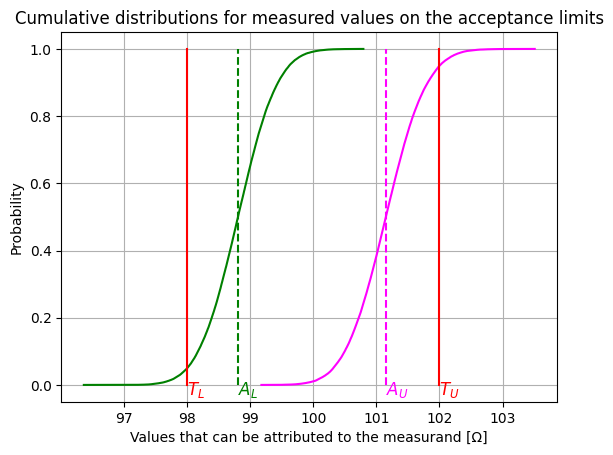

In [44]:
#Defines the x-axis range for the plot
N=1000 #number of point
X=np.linspace(TL-2*sigma, TU+2*sigma,N)

#Computes AL and AU in the different cases
if pdftype=='norm':
    AL=TL-math.sqrt(2)*sigma*erfinv(2*MAL-1)
    AU=TU+math.sqrt(2)*sigma*erfinv(2*MAL-1)
    print('Normal probability distribution\nAL = ', "{:.2f}".format(AL), ' ', measunit, '\nAU = ', "{:.2f}".format(AU), ' ', measunit)
    #prepares the plot
    YL=norm.pdf(X,AL,sigma)
    YU=norm.pdf(X,AU,sigma)
    Ymax=max(max(YL),max(YU))
    plt.plot(X,YL, color='green')
    plt.plot(X,YU, color='magenta')
    plt.plot([AL,AL],[0,Ymax], color='green', linestyle='--')
    plt.plot([AU,AU],[0,Ymax], color='magenta', linestyle='--')
    plt.plot([TL,TL],[0,Ymax], color='red', linestyle='-', linewidth=2.5)
    plt.plot([TU,TU],[0,Ymax], color='red', linestyle='-', linewidth=2.5)
    plt.fill_between(X, YU, where=(X >= TU) & (X <= TU+2*sigma), color='magenta', alpha=0.3)
    plt.fill_between(X, YL, where=(X >= TL-2*sigma) & (X <= TL), color='green', alpha=0.3)
    plt.xlabel('Values that can be attributed to the measurand ['+measunit+']')
    plt.ylabel('Probability')
    plt.title('Distribution of values when ${x_m}$ = ${A_L};{A_U}$')
    plt.text(AL, -Ymax/20, r'$\it{A_L}$', fontsize=12, color='green')
    plt.text(AU, -Ymax/20, r'$\it{A_U}$', fontsize=12, color='magenta')
    plt.text(TL, -Ymax/20, r'$\it{T_L}$', fontsize=12, color='red')
    plt.text(TU, -Ymax/20, r'$\it{T_U}$', fontsize=12, color='red')
    plt.grid(True)
    plt.show()


elif pdftype=='unif':
    AL=TL+au*(1-2*MAL)
    AU=TU-au*(1-2*MAL)
    print('Uniform probability distribution\nAL = ', "{:.2f}".format(AL), ' ', measunit, '\nAU = ', "{:.2f}".format(AU), ' ', measunit)
    #prepares the plot
    YL=uniform.pdf(X,AL-au,2*au)
    YU=uniform.pdf(X,AU-au,2*au)
    Ymax=max(max(YL),max(YU))
    plt.plot(X,YL, color='green')
    plt.plot(X,YU, color='magenta')
    plt.plot([AL,AL],[0,Ymax], color='green', linestyle='--')
    plt.plot([AU,AU],[0,Ymax], color='magenta', linestyle='--')
    plt.plot([TL,TL],[0,Ymax], color='red', linestyle='-', linewidth=2.5)
    plt.plot([TU,TU],[0,Ymax], color='red', linestyle='-', linewidth=2.5)
    plt.fill_between(X, YU, where=(X >= TU) & (X <= TU+2*sigma), color='magenta', alpha=0.3)
    plt.fill_between(X, YL, where=(X >= TL-2*sigma) & (X <= TL), color='green', alpha=0.3)
    plt.xlabel('Values that can be attributed to the measurand ['+measunit+']')
    plt.ylabel('Probability')
    plt.title('Distribution of values when ${x_m}$ = ${A_L};{A_U}$')
    plt.text(AL, -Ymax/20, r'$\it{A_L}$', fontsize=12, color='green')
    plt.text(AU, -Ymax/20, r'$\it{A_U}$', fontsize=12, color='magenta')
    plt.text(TL, -Ymax/20, r'$\it{T_L}$', fontsize=12, color='red')
    plt.text(TU, -Ymax/20, r'$\it{T_U}$', fontsize=12, color='red')
    plt.grid(True)
    plt.show()

elif pdftype=='tri':
    AL=TL+at*(1-math.sqrt(2*MAL))
    AU=TU-at*(1-math.sqrt(2*MAL))
    print('Triangular probability distribution\nAL = ', "{:.2f}".format(AL), ' ', measunit, '\nAU = ', "{:.2f}".format(AU), ' ', measunit)
    #prepares the plot
    YL=generate_triangular_distribution(X, AL, AL-at, AL+at)
    YU=generate_triangular_distribution(X, AU, AU-at, AU+at)
    Ymax=max(max(YL),max(YU))
    plt.plot(X,YL, color='green')
    plt.plot(X,YU, color='magenta')
    plt.plot([AL,AL],[0,Ymax], color='green', linestyle='--')
    plt.plot([AU,AU],[0,Ymax], color='magenta', linestyle='--')
    plt.plot([TL,TL],[0,Ymax], color='red', linestyle='-', linewidth=2.5)
    plt.plot([TU,TU],[0,Ymax], color='red', linestyle='-', linewidth=2.5)
    plt.fill_between(X, YU, where=(X >= TU) & (X <= TU+2*sigma), color='magenta', alpha=0.3)
    plt.fill_between(X, YL, where=(X >= TL-2*sigma) & (X <= TL), color='green', alpha=0.3)
    plt.xlabel('Values that can be attributed to the measurand ['+measunit+']')
    plt.ylabel('Probability')
    plt.title('Distribution of values when ${x_m}$ = ${A_L};{A_U}$')
    plt.text(AL, -Ymax/20, r'$\it{A_L}$', fontsize=12, color='green')
    plt.text(AU, -Ymax/20, r'$\it{A_U}$', fontsize=12, color='magenta')
    plt.text(TL, -Ymax/20, r'$\it{T_L}$', fontsize=12, color='red')
    plt.text(TU, -Ymax/20, r'$\it{T_U}$', fontsize=12, color='red')
    plt.grid(True)
    plt.show()

elif pdftype=='trap':
    AL=TL+atrap*(1-math.sqrt(2*MAL*(1-beta**2)))
    AU=TU-atrap*(1-math.sqrt(2*MAL*(1-beta**2)))
    print('Trapezoidal probability distribution\nAL = ', "{:.2f}".format(AL), ' ', measunit, '\nAU = ', "{:.2f}".format(AU), ' ', measunit)
    #prepares the plot
    YL=generate_trapezoidal_distribution(X, AL-atrap, AL-beta*atrap, AL+beta*atrap, AL+atrap)
    YU=generate_trapezoidal_distribution(X, AU-atrap, AU-beta*atrap, AU+beta*atrap, AU+atrap)
    Ymax=max(max(YL),max(YU))
    plt.plot(X,YL, color='green')
    plt.plot(X,YU, color='magenta')
    plt.plot([AL,AL],[0,Ymax], color='green', linestyle='--')
    plt.plot([AU,AU],[0,Ymax], color='magenta', linestyle='--')
    plt.plot([TL,TL],[0,Ymax], color='red', linestyle='-', linewidth=2.5)
    plt.plot([TU,TU],[0,Ymax], color='red', linestyle='-', linewidth=2.5)
    plt.fill_between(X, YU, where=(X >= TU) & (X <= TU+2*sigma), color='magenta', alpha=0.3)
    plt.fill_between(X, YL, where=(X >= TL-2*sigma) & (X <= TL), color='green', alpha=0.3)
    plt.xlabel('Values that can be attributed to the measurand ['+measunit+']')
    plt.ylabel('Probability')
    plt.title('Distribution of values when ${x_m}$ = ${A_L};{A_U}$')
    plt.text(AL, -Ymax/20, r'$\it{A_L}$', fontsize=12, color='green')
    plt.text(AU, -Ymax/20, r'$\it{A_U}$', fontsize=12, color='magenta')
    plt.text(TL, -Ymax/20, r'$\it{T_L}$', fontsize=12, color='red')
    plt.text(TU, -Ymax/20, r'$\it{T_U}$', fontsize=12, color='red')
    plt.grid(True)
    plt.show()

elif pdftype=='MC':
    #Opens the files with the simulated measured data
    TLfile_path=open_file("Open the file containing the measured data on the lower tolerance limit")
    TLmatrix=read_data_from_file(TLfile_path)
    TUfile_path=open_file("Open the file containing the measured data on the upper tolerance limit")
    TUmatrix=read_data_from_file(TUfile_path)

    #Generates the histograms of the simulated data
    bins=int(np.size(TLmatrix)/10)
    #Lower tolerance
    histL_values, binL_edges = np.histogram(TLmatrix, bins)
    #normalizza l'istogramma
    areaL=0
    for i in range(bins):
        areaL+=histL_values[i]*(binL_edges[i+1]-binL_edges[i])
    nor_histL_values=np.zeros(bins)
    for i in range(bins):
        nor_histL_values[i]=float(histL_values[i])/(areaL)
    #Upper tolerance
    histU_values, binU_edges = np.histogram(TUmatrix, bins)
    #normalizza l'istogramma
    areaU=0
    for i in range(bins):
        areaU+=histU_values[i]*(binU_edges[i+1]-binU_edges[i])
    nor_histU_values=np.zeros(bins)
    for i in range(bins):
        nor_histU_values[i]=float(histU_values[i])/(areaU)
    
    #Generates the cumulative distribution functions
    YCL=np.zeros(bins)
    for i in range(bins-1):
        YCL[i+1]=YCL[i]+nor_histL_values[i]*(binL_edges[i+1]-binL_edges[i])
    YCU=np.zeros(bins)
    for i in range(bins-1):
        YCU[i+1]=YCU[i]+nor_histU_values[i]*(binU_edges[i+1]-binU_edges[i])
    
    # Finds the point for wich the cumulative probability is 1-MAL
    i=0
    while YCL[i]<MAL:
        i+=1
    AL=2*TL-binL_edges[i]
    i=0
    while YCU[i]<1-MAL:
        i+=1
    AU=2*TU-binU_edges[i]
    print('Probability distribution from MonteCarlo simulation\nAL = ', "{:.2f}".format(AL), ' ', measunit, '\nAU = ', "{:.2f}".format(AU), ' ', measunit)
    
    #Plots the shifted cumulative probability functions
    DL=AL-TL
    DU=AU-TU
    plt.plot(binL_edges[1:]+DL,YCL, color='green')
    plt.plot(binU_edges[1:]+DU,YCU, color='magenta')
    plt.plot([AL,AL],[0,1], color='green', linestyle='--')
    plt.plot([AU,AU],[0,1], color='magenta', linestyle='--')
    plt.plot([TL,TL],[0,1], color='red', linestyle='-', linewidth=1.5)
    plt.plot([TU,TU],[0,1], color='red', linestyle='-', linewidth=1.5)
    plt.xlabel('Values that can be attributed to the measurand ['+measunit+']')
    plt.ylabel('Probability')
    plt.title('Cumulative distributions for measured values on the acceptance limits')
    plt.text(AL, -0.03, r'$\it{A_L}$', fontsize=12, color='green')
    plt.text(AU, -0.03, r'$\it{A_U}$', fontsize=12, color='magenta')
    plt.text(TL, -0.03, r'$\it{T_L}$', fontsize=12, color='red')
    plt.text(TU, -0.03, r'$\it{T_U}$', fontsize=12, color='red')
    plt.grid(True)
    plt.show()

    #print("Probability distribution coming from a Monte Carlo simulation\nNot yet available")

else:
    print("Wrong probability distribution type")